# Model 


# import data

In [81]:
import os
import sys
from pyprojroot import here

import pandas as pd

In [82]:
# Read in the data in the previous step
df = pd.read_pickle('..\data\processed\data_clean.pkl')
df.T

,0,1,2,3,4,5,6,7,8,9,...,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133
project_title,density matrix renormalization group simulatio...,adolescent depressive vulnerability through th...,autonomic computing laboratory,laboratory for forest genomics,stoe ipds diffractometer stateoftheart image ...,infrastructure to investigate the role of t ly...,malleable costeffective highperformance comput...,cold regions biogeochemical research,sexual health research facility,role of vagal afferents in nutrient signalling...,...,gene therapy development for musculoskeletal d...,surviving memory in postwar el salvador a coll...,mapping stories global research lab,speciation analyses for elucidating molecular ...,the climatedatadriven design cd3 facility for ...,establishment of the intelligent visualization...,infrastructure for the catalytic synthesis of ...,niagara college nextgen greenhouse excellence,lambton water centre,cambrian college
project_description,proposed infrastructure to consist of a comput...,the proposed infrastructure consisting of onsi...,autonomic computing laboratory will enable res...,the proposed facility will enable the examina...,researchers at mcmaster university intend to u...,allergic and autoimmune diseases such as asthm...,a malleable costeffective highperformance comp...,the proposed research will investigate the bio...,the research infrastructure is required for th...,the objective of the research is to understand...,...,this proposal will identify diseasemodifying g...,surviving memory in postwar el salvador is an ...,his application requests infrastructure to est...,selenium se is an important contaminant releas...,this proposal outlines the equipment necessary...,this application is for funds to develop the i...,the proposed project will develop efficient co...,niagara college looks to expand upon strategic...,through this orf request lambton college will ...,through the battery electric vehicle lab bevl ...
area_primary,763,4,25,63,76,41,76,310,4,49,...,41,87,87,34,23,10,74,NaN,NaN,NaN
discipline_primary,12300.0,15100.0,11800.0,14400.0,13000.0,15200.0,11600.0,13500.0,15100.0,15200.0,...,41800.0,20001.0,22700.0,12900.0,10100.0,11800.0,13100.0,NaN,NaN,NaN
approval_date,2005-10-24 00:00:00,2005-07-22 00:00:00,2005-10-24 00:00:00,2005-07-22 00:00:00,2006-12-21 00:00:00,2006-08-31 00:00:00,2005-07-22 00:00:00,2005-10-24 00:00:00,2005-10-24 00:00:00,2005-10-24 00:00:00,...,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2022-03-01 00:00:00,2022-03-01 00:00:00,2022-03-01 00:00:00
lead_research_institution,university of windsor,university of toronto,university of toronto,university of toronto,mcmaster university,mcmaster university,queens university,queens university,queens university,queens university,...,western university,western university,wilfrid laurier university,wilfrid laurier university,york university,york university,york university,niagara college,lambton college,cambrian college
city,windsor,toronto,toronto,toronto,hamilton,hamilton,kingston,kingston,kingston,kingston,...,london,london,waterloo,waterloo,toronto,toronto,toronto,niaraga on the lake,sarnia,sudbury
ontario_commitment,50000,59422,292551,200000,100000,197078,100000,128000,64000,125000,...,387254,52026,57077,200000,140000,114726,160000,892391,597715,1000000
total_project_costs,175708,148557,731377,500000,261369,492695,441005,320000,160000,312500,...,968135,130067,150858,500000,365313,329452,447211,7422302,1494288,2765734
keyword,density matrix renormalization group numerical...,depression adolescence cognitive vulnerability...,scaling availability adaptive selfmanaging sel...,comparative functional genomics molecular biol...,magnetocaloric materials for magnetic refriger...,immunology immunomodulation asthma allergy aut...,reconfigurable architectures selfadaptive comp...,biogeochemistry arctic and alpine environments...,sexual health laboratory p

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   project_title              3134 non-null   object        
 1   project_description        3134 non-null   object        
 2   area_primary               3129 non-null   object        
 3   discipline_primary         3130 non-null   float64       
 4   approval_date              3134 non-null   datetime64[ns]
 5   lead_research_institution  3134 non-null   object        
 6   city                       3133 non-null   object        
 7   ontario_commitment         3134 non-null   int32         
 8   total_project_costs        3134 non-null   int32         
 9   keyword                    1077 non-null   object        
 10  year                       3134 non-null   int64         
 11  month                      3134 non-null   int64         
 12  label_

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer

In [89]:
MultiLabelBinarizer().fit_transform(df['label_total_project_costs'])

TypeError: 'int' object is not iterable

In [87]:
df['label_total_project_costs']

0       0
1       0
2       2
3       2
4       1
       ..
3129    1
3130    2
3131    3
3132    3
3133    3
Name: label_total_project_costs, Length: 3134, dtype: int32

# Split the data to train-test

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
y1=df['label_total_project_costs'] #multiclass classifier model1
y2=df['label_ontario_commitment'] #multiclass classifier model2
y3=df['total_project_costs'] #regression model3
y4=df['ontario_commitment']  # regression model 4
y5=df['ontario_share']       #regression model 5
x=df['project_title']


In [6]:
def split_data(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
    return (x_train,x_test,y_train,y_test)

In [7]:
x_train,x_test,y_train1,y_test1 =split_data(x,y1)
x_train,x_test,y_train2,y_test2 =split_data(x,y2)
x_train,x_test,y_train3,y_test3 =split_data(x,y3)
x_train,x_test,y_train4,y_test4 =split_data(x,y4)
x_train,x_test,y_train5,y_test5 =split_data(x,y5)

In [9]:
len(x_train),len(x_test)

(2350, 784)

In [12]:
x_train.shape,y_train1.shape

((2350,), (2350,))

In [14]:
x_train

2855    system for flame synthesis collection and char...
1644    centre for the evaluation of technological inn...
2657    predictive immune monitoring approaches for pr...
2765                            design observation studio
518     biotechnology for wood fibre processing and en...
                              ...                        
3092    development of valueadded biodegradable multil...
1095    experimental facility for advanced manufacturi...
1130    neural and metabolic correlates of emotional p...
1294                      watershed analysis and modeling
860                    the ecological genomics laboratory
Name: project_title, Length: 2350, dtype: object

# Tf-idf


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atieh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords

In [23]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',
                             lowercase=True,
                             max_df=0.9,
                             min_df=2,
                             ngram_range=(1,3),
                             stop_words='english')

In [24]:
tfidfvectorizer.fit(x_train)
tfidf_train = tfidfvectorizer.transform(x_train)

In [25]:
tfidf_test  = tfidfvectorizer.transform(x_test)

In [26]:
tfidf_train.shape,tfidf_test.shape

((2350, 2709), (784, 2709))

In [28]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
count_wm=countvectorizer.fit_transform(x_train)

In [29]:
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_train.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      1000mhz  120c  1861  1871  18752010  1891  1d  20  2020  2d  ...  york  \
0           0     0     0     0         0     0   0   0     0   0  ...     0   
1           0     0     0     0         0     0   0   0     0   0  ...     0   
2           0     0     0     0         0     0   0   0     0   0  ...     0   
3           0     0     0     0         0     0   0   0     0   0  ...     0   
4           0     0     0     0         0     0   0   0     0   0  ...     0   
...       ...   ...   ...   ...       ...   ...  ..  ..   ...  ..  ...   ...   
2345        0     0     0     0         0     0   0   0     0   0  ...     0   
2346        0     0     0     0         0     0   0   0     0   0  ...     0   
2347        0     0     0     0         0     0   0   0     0   0  ...     0   
2348        0     0     0     0         0     0   0   0     0   0  ...     0   
2349        0     0     0     0         0     0   0   0     0   0  ...     0   

      young  youth  y

In [31]:
tfidf_train.shape, tfidf_test.shape

((2350, 2709), (784, 2709))

In [32]:
len(tfidf_tokens)

2709

In [33]:
len(set(tfidf_tokens))

2709

In [34]:
#fit change and fit the model
#transform just return the value of known model
type(tfidf_train)

scipy.sparse.csr.csr_matrix

In [35]:
tfidf_tokens

['20',
 '2d',
 '3d',
 '600',
 '600 mhz',
 'aboriginal',
 'accelerated',
 'acceleration',
 'accelerator',
 'acdc',
 'achieve',
 'acid',
 'acoustic',
 'acquired',
 'acquired brain',
 'acquisition',
 'action',
 'activation',
 'active',
 'activities',
 'activity',
 'acute',
 'acute chronic',
 'adaptable',
 'adaptation',
 'adaptations',
 'adaptive',
 'addiction',
 'addictions',
 'additive',
 'additive manufacturing',
 'addressing',
 'adhesion',
 'adipose',
 'adipose tissue',
 'adolescent',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advanced biomedical',
 'advanced building',
 'advanced digital',
 'advanced flow',
 'advanced imaging',
 'advanced infrastructure',
 'advanced laboratory',
 'advanced mass',
 'advanced mass spectrometry',
 'advanced materials',
 'advanced photovoltaic',
 'advanced power',
 'advanced power electronics',
 'advanced research',
 'advanced scanning',
 'advanced sensor',
 'advances',
 'advancing',
 'aerial',
 'aerosol',
 'aerosol research',
 'aerospace',
 'afar',


In [36]:
tfidf_train.nonzero()[1] #Return the indices of the elements that are non-zero.

array([2471, 1727,  458, ..., 1017,  717,  715], dtype=int32)

In [37]:
tfidf_train.nonzero()

(array([   0,    0,    0, ..., 2349, 2349, 2349], dtype=int32),
 array([2471, 1727,  458, ..., 1017,  717,  715], dtype=int32))

In [38]:
import numpy as np
a=np.array([[3,0,4],[4,7,0]])
a, a.nonzero()

(array([[3, 0, 4],
        [4, 7, 0]]),
 (array([0, 0, 1, 1], dtype=int64), array([0, 2, 0, 1], dtype=int64)))

In [39]:
a.nonzero()[1]

array([0, 2, 0, 1], dtype=int64)

In [40]:
tfidf_train.shape

(2350, 2709)

In [41]:
#extract the words for with the tf-idf of higher than 0.7 for train set.
m=0
d=[]
for col in tfidf_train1.nonzero()[1]:
    if tfidf_train[tfidf_train1.nonzero()[0][m],col] > 0.7:
        #print (words[col], '-', tfidf_train[tfidf_train.nonzero()[0][m],col])
        d.append((tfidf_tokens[col],tfidf_train1[tfidf_train1.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('tfidf_tokens', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False)    

,tfidf_tokens,tf-idf
121,project,1.000000
132,array,1.000000
56,transition,1.000000
65,renewable,1.000000
70,house,1.000000
...,...,...
191,imaging research,0.702776
39,security,0.702055
233,learning,0.701984
97,public,0.700793


In [42]:
len(df['tfidf_tokens'].unique())

212

In [43]:
df['tfidf_tokens'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240     True
241     True
242     True
Name: tfidf_tokens, Length: 243, dtype: bool

In [44]:
df.loc[df.duplicated(), :]

,tfidf_tokens,tf-idf
30,laboratory,1.000000
79,lab,1.000000
131,infrastructure,0.777126
169,lab,1.000000
185,laboratory,1.000000
198,laboratory,1.000000
242,lab,1.000000


In [45]:
#extract the words for with the tf-idf of higher than 0.5 for test set.
m=0
d=[]
for col in tfidf_test.nonzero()[1]:
    if tfidf_test[tfidf_train.nonzero()[0][m],col] > 0.5:
        #print (words[col], '-', tfidf_test[tfidf_train.nonzero()[0][m],col])
        d.append((tfidf_tokens[col],tfidf_test[tfidf_train.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('tfidf_tokens', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False) 

,tfidf_tokens,tf-idf
9,approaches,0.788755
4,integrative,0.747842
1,optimization,0.717931
5,cancer,0.663877
0,simulation,0.637663
11,laboratory,0.629345
8,environmental,0.614708
7,robotic,0.552993
13,retinal,0.532596
3,confocal,0.529295


# Model

In [118]:
x_train=tfidf_train
x_test=tfidf_test

In [119]:
x_train.shape,x_test.shape

((2350, 2709), (784, 2709))

In [121]:
y_train1.shape

(2350,)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train1)

LogisticRegression(random_state=42)

In [50]:
x_test.shape,x_train.shape

((784, 2709), (2350, 2709))

In [51]:
y_test1.shape,y_train1.shape

((784,), (2350,))

In [52]:
model.score(x_test,y_test1)

0.35586734693877553

In [53]:
y_pred=model.predict(x_test)

In [55]:
type(y_pred),type(y_test1)

(numpy.ndarray, pandas.core.series.Series)

In [57]:
y_test1.value_counts()

1    210
0    196
3    194
2    184
Name: label_total_project_costs, dtype: int64

In [58]:
pd.Series(y_pred).value_counts()

3    214
0    203
2    192
1    175
dtype: int64

In [66]:
y_preds=pd.Series(y_pred)

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_preds))

[[76 50 40 30]
 [61 51 51 47]
 [35 42 61 46]
 [31 32 40 91]]


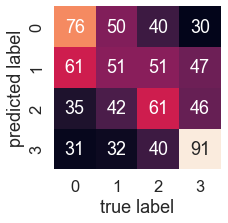

In [70]:
# Import Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test1, y_preds)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_preds))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38       196
           1       0.29      0.24      0.26       210
           2       0.32      0.33      0.32       184
           3       0.43      0.47      0.45       194

    accuracy                           0.36       784
   macro avg       0.35      0.36      0.35       784
weighted avg       0.35      0.36      0.35       784



# Multiclass classifier one vs Rest

In [130]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [140]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(x_train,y_train1)
clf.score(x_test,y_test1)

0.3392857142857143

In [142]:
y_preds1=clf.predict(x_test)
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.36      0.44      0.39       196
           1       0.29      0.21      0.25       210
           2       0.29      0.28      0.29       184
           3       0.39      0.42      0.41       194

    accuracy                           0.34       784
   macro avg       0.33      0.34      0.33       784
weighted avg       0.33      0.34      0.33       784



In [141]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(x_train,y_train2)
clf.score(x_test,y_test2)

0.336734693877551

In [148]:
clf.score(x_train,y_train2)

0.9472340425531914

In [143]:
y_preds2=clf.predict(x_test)
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.40      0.41      0.40       230
           1       0.25      0.22      0.23       181
           2       0.31      0.28      0.29       190
           3       0.36      0.42      0.39       183

    accuracy                           0.34       784
   macro avg       0.33      0.33      0.33       784
weighted avg       0.33      0.34      0.33       784



# Regression

In [144]:
from sklearn.linear_model import LinearRegression

In [146]:
reg = LinearRegression().fit(x_train, y_train3)

In [147]:
reg.score(x_train, y_train3)

0.9721708454815552

In [152]:
reg.score(x_test, y_test3)

-474.56714198385305

In [154]:
reg = LinearRegression().fit(x_train, y_train4)
reg.score(x_train, y_train4)

0.9865839260881447

In [155]:
reg.score(x_test, y_test4)

-198.77084979343422

In [156]:
reg = LinearRegression().fit(x_train, y_train5)
reg.score(x_train, y_train5)

0.981783864124623

In [157]:
reg.score(x_test, y_test5)

-1925.6799358327073